# Modelagem de tópicos com ETM no *Reddit* - Resultados de treinamento

Os testes com modelos ETM a seguir foram realizados usando como base o *corpus* empregado no treinamento dos modelos LDA previamente avaliados.

Uma etapa de pré-processamento adicional foi inserida para produção de um *input* no formato esperado pelo programa. De resto, *lemmatizações* e categorias de termos mantidas mantém em relação aos testes precedentes com LDA.

### Importações e configurações de ambiente

In [30]:
%load_ext autoreload
%autoreload 2

from utils.plots import plot_wordcloud, plot_graph, plot_wordcloud_by_word_probability, plot_pie_chart
import sys, time, json, os, joblib, numpy as np, pandas as pd, ast
pd.options.display.max_colwidth = 100
from utils.notebook import create_dataframe_from_topics, get_topic_word_probability_pairs
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

pyLDAvis.enable_notebook()

WORKDIR = f'{os.getcwd()}'.replace('src', '/')
etm_results_csv = WORKDIR + "/results/csv/etm/etm_results.csv"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Carregamento dos resultados do treinamento

In [28]:
etm_results = pd.read_csv(etm_results_csv)

#### Modelos com maior taxa de coerência

In [7]:
results_by_coherence = etm_results.sort_values(["gensim_coherence"], ascending=(False))
results_by_coherence.head()

,Unnamed: 0,k,model,coherence,gensim_coherence,diversity,perplexity,topics,10_most_used_topics,path
0,0,5.0,reddit_pt_nouns_k5,0.137035,0.412755,0.848000,434.1,"[['amigo', 'tempo', 'problema', 'ansiedade', 'relacionamento', 'momento', 'namorar', 'sentir', '...",[2 4 3 0 1],./results/etm_reddit_pt_nouns_K_5_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_1000...
2,2,15.0,reddit_pt_nouns_k15,0.144165,0.398119,0.701333,418.1,"[['horar', 'pontar', 'filhar', 'cabeca', 'pelar', 'sensacao', 'futurar', 'empresar', 'forcar', '...",[13 14 1 0 11 5 4 6 9 12],./results/etm_reddit_pt_nouns_K_15_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_100...
1,1,10.0,reddit_pt_nouns_k10,0.132672,0.392002,0.736000,411.7,"[['tratamento', 'formar', 'ajudar', 'psiquiatro', 'terapia', 'vezar', 'problema', 'remedios', 'f...",[1 4 7 6 2 0 5 9 3 8],./results/etm_reddit_pt_nouns_K_10_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_100...
3,3,20.0,reddit_pt_nouns_k20,0.134368,0.369151,0.650000,410.4,"[['merda', 'dinheiro', 'caro', 'caralho', 'atar', 'porra', 'problema', 'drogar', 'puta', 'tempo'...",[18 16 8 9 3 10 13 1 19 5],./results/etm_reddit_pt_nouns_K_20_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_100...
4,4,25.0,reddit_pt_nouns_k25,0.137939,0.361719,0.561600,411.5,"[['problema', 'fato', 'verdade', 'tempo', 'momento', 'maneiro', 'certeza', 'assunto', 'vezar', '...",[ 1 18 16 14 21 17 10 7 23 12],./results/etm_reddit_pt_nouns_K_25_Htheta_800_Optim_adam_Clip_0.0_ThetaAct_relu_Lr_0.005_Bsz_100...


#### Modelo com 5 tópicos

In [35]:
topics = ast.literal_eval(etm_results[etm_results["k"] == 5].iloc[0]["topics"])
colors = ['black', 'red', 'green', 'blue', 'orange']

O seguinte tópico parece abordar **relacionamentos sociais**.

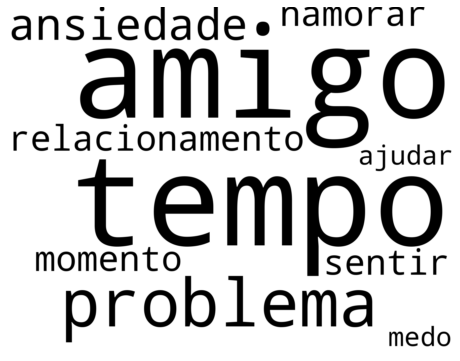

In [36]:
plot_wordcloud(topics[0], colors[0])

O seguinte tópico parece ser relativo a **relacionamentos familiares**.

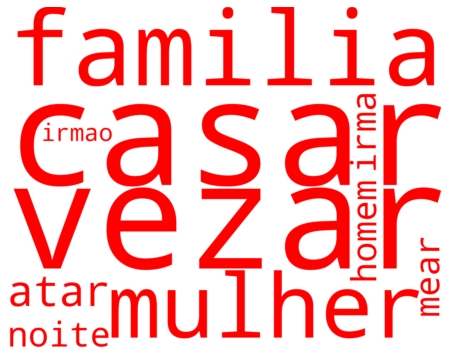

In [37]:
plot_wordcloud(topics[1], colors[1])

Os termos do seguinte tópico remetem a **vida estudantil**.

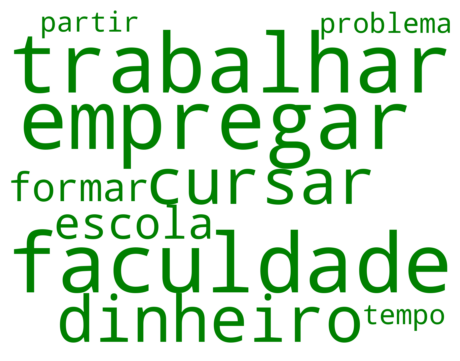

In [39]:
plot_wordcloud(topics[2], colors[2])

**Pensamentos negativos** parecem formar o cerne do tópico a seguir.

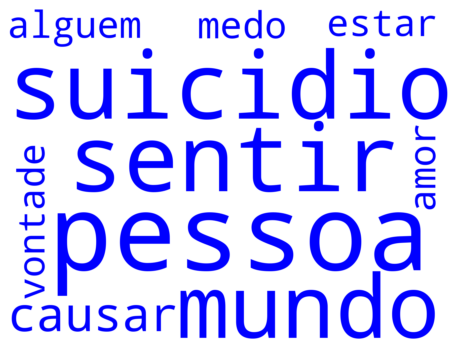

In [40]:
plot_wordcloud(topics[3], colors[3])

O seguinte tópico é de difícil rotulação.

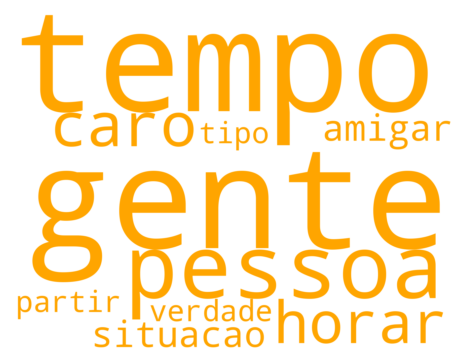

In [38]:
plot_wordcloud(topics[4], colors[4])

Parte dos tópicos é difícil de descrever, dado que não possuem significado claro e agregam termos com pouquíssima relação entre si. Tais tópicos são chamados comumente de *junk topics*. Pode-se enumerar tópicos como o 16, 8, 20 e 7 como exemplares desse tipo de tópico.

Contudo, percebe-se que outros tópicos agregam significados mais interessantes. Um olhar mais aprofundado será dispensado a esses tópicos.

#### Modelo com 15 tópicos

In [41]:
topics2 = ast.literal_eval(etm_results[etm_results["k"] == 15].iloc[0]["topics"])

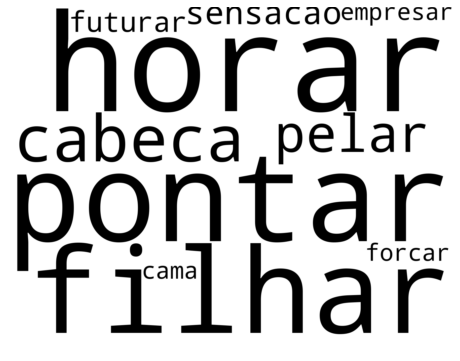

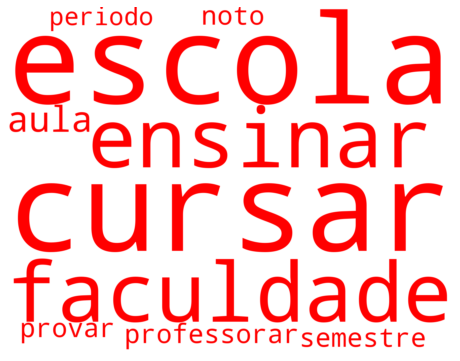

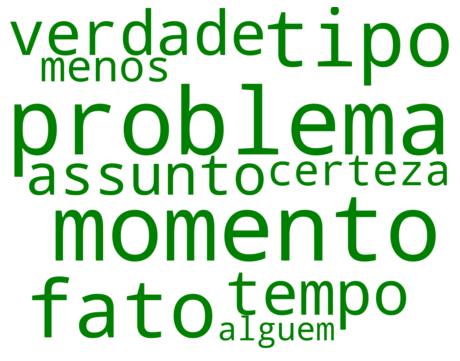

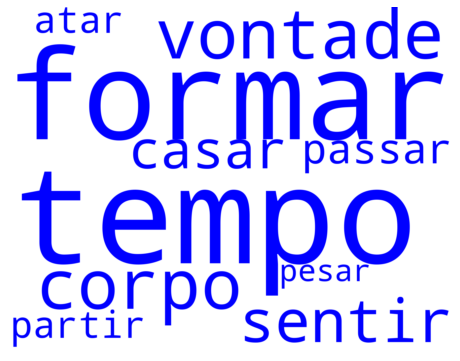

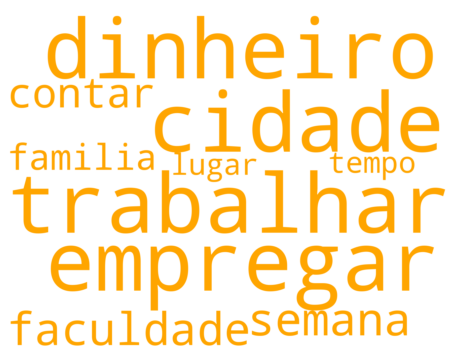

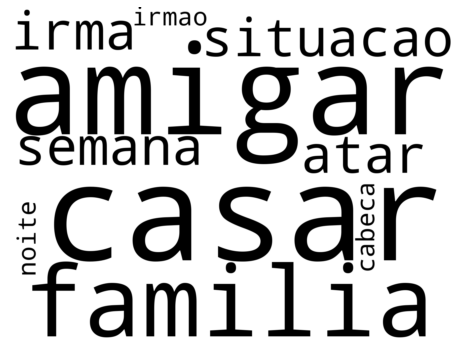

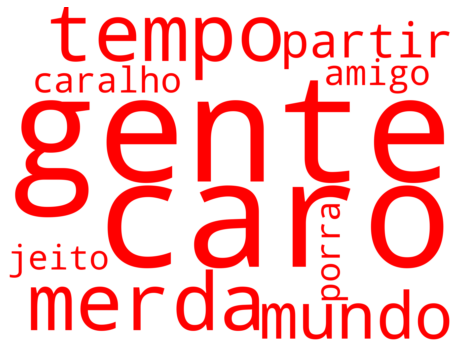

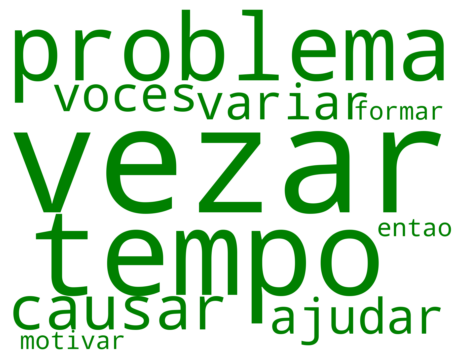

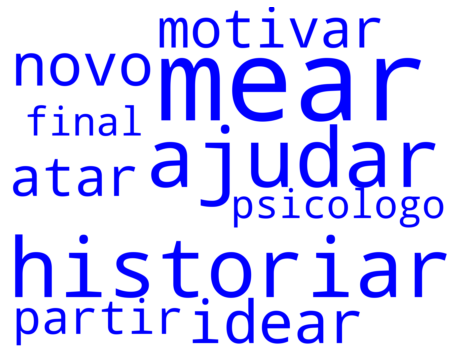

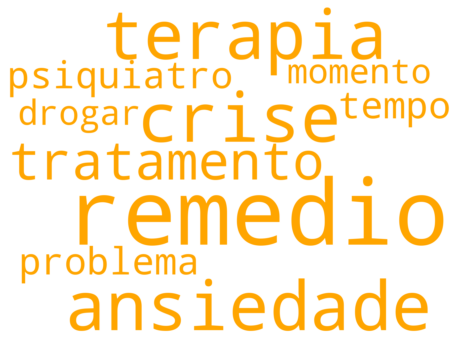

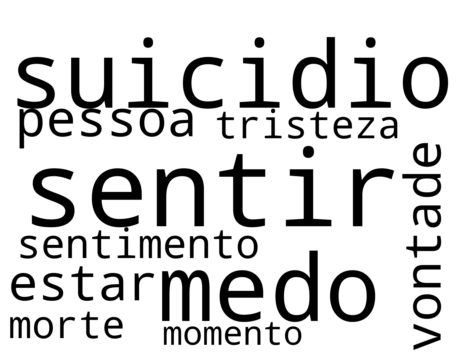

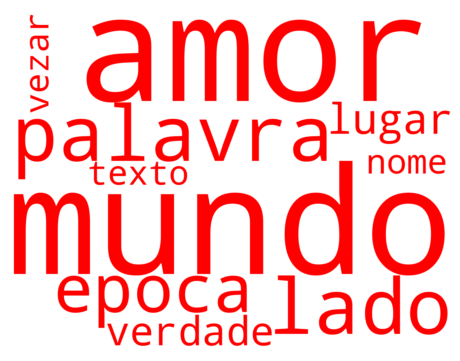

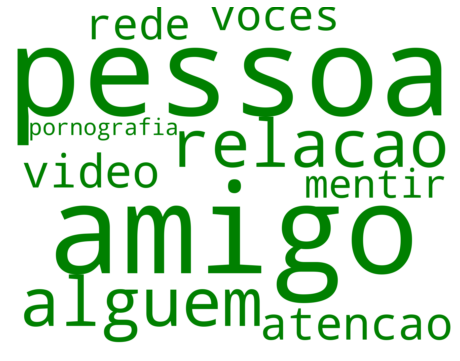

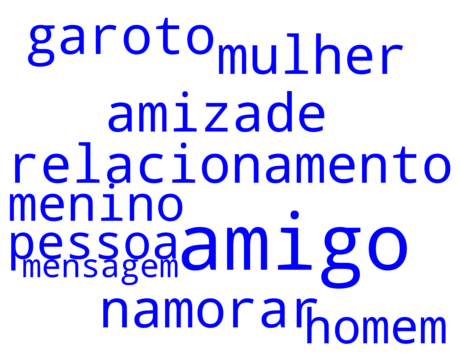

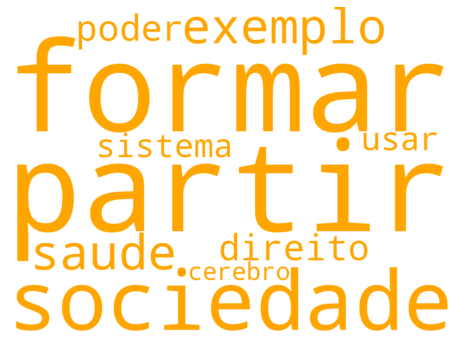

In [43]:
for i in range(len(topics2)):
    plot_wordcloud(topics2[i], colors[i % len(colors)])

O tópico a seguir não tem sentido lógico.

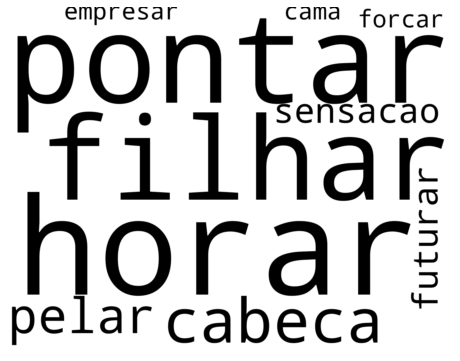

In [44]:
plot_wordcloud(topics2[0], colors[0])

**Vida estudantil** é o tema deste tópico.

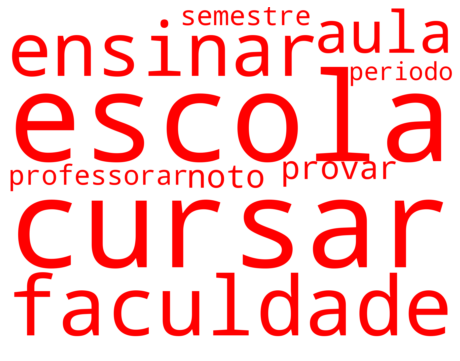

In [49]:
plot_wordcloud(topics2[1], colors[1])

Este tópico aborda **vida profissional**.

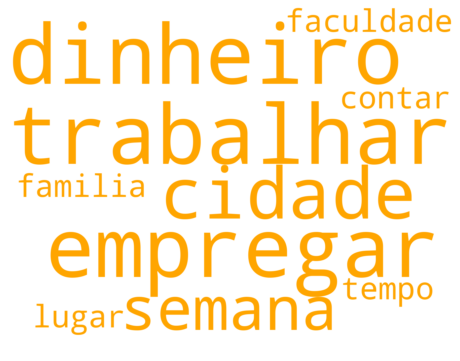

In [50]:
plot_wordcloud(topics2[4], colors[4])

O tópico seguinte aborda **tratamento e acompanhamento mental**.

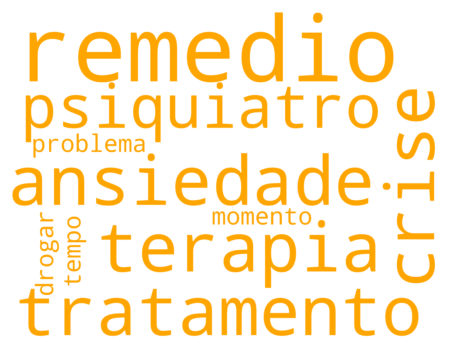

In [47]:
plot_wordcloud(topics2[9], colors[9 % len(colors)])

Tópico sobre **preocupações mórbidas e pensamentos negativos**.

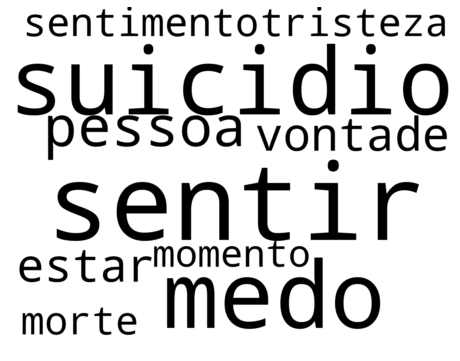

In [51]:
plot_wordcloud(topics2[10], colors[10 % len(colors)])

Tópico sobre **relacionamentos pessoais**.

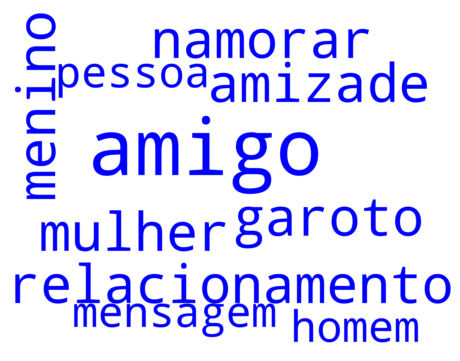

In [53]:
plot_wordcloud(topics2[13], colors[13 % len(colors)])

### Conclusões

Dois modelos foram avaliados nesta análise, um deles com 5 tópicos e outro com 15. Percebeu-se que uma maior parcela dos tópicos obtidos nos dois modelos está relacionada a depressão em comparação com os tópicos apresentados pelos modelos LDA. Por exemplo, o modelo de 5 tópicos produziu quatro tópicos com significado claro e condizente com o tema depressão. Por outro lado, o modelo com 15 tópicos apresentou de forma geral 5 tópicos relativos ao tema, enquanto os outros tópicos pareciam associar termos com pouco significado.

Considerando-se que para o treinamento ETM apenas adpatações simples foram realizadas - sem mudança no algoritmo original -, pode-se dizer que o ETM teve um desempenho *out-of-the-box* mais preciso quanto a descrição dos tópicos.

Uma avaliação mais precisa, naturalmente, só poderá ser realizada quando comparações entre modelos treinados em um *dataset* mais amplo forem feitas.